In [5]:
# This is just to enable improting the generated SDK from the examples folder in the pygen repository
import sys

from tests.constants import REPO_ROOT

sys.path.append(str(REPO_ROOT / "examples"))

# Working with Edges

Ofte edges in our data model is simply connecting two nodes. However, it is possible to have properties on edges as we have on nodes. This can be useful for filtering on these properties to select which nodes and edges we want.

In this example, we will use the model shown below in the Cognite Data Fusion interface:

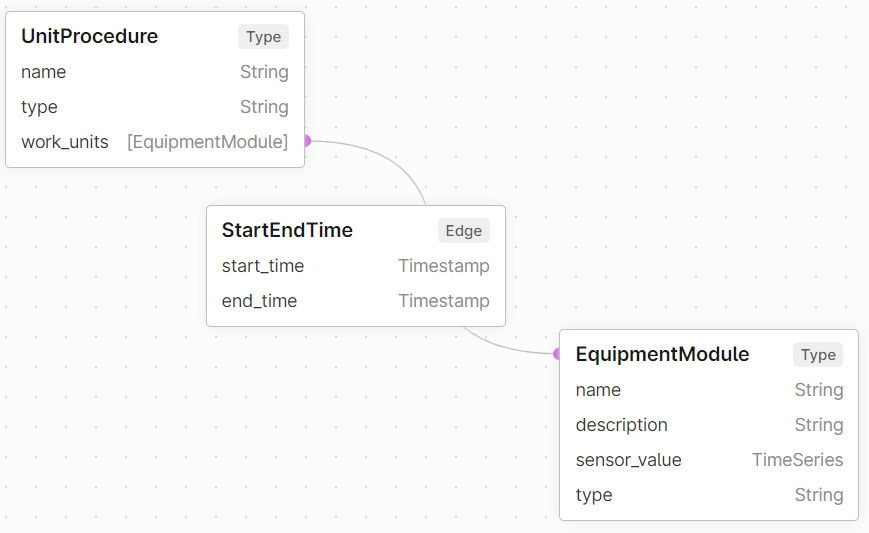


We note that we have one two `views`/`types` used for `nodes`, `UnitProcedure`and `EquipmentModule`, and one for edges `StartEndTime`. A `UnitProcedure` is connected through multiple `EquipmentModules` thorugh the `StartEndTime` edge.


First, we have to generate an SDK for the `EquipmentUnit` model. The call below shows a truncated version of the call used to generate the SDK.

```bash
pygen generate --client-name EquipmentUnitClient --to-level-package equipment_unit
```

Note that you can use any of the methods for generating the SDK as described in see the [QuickStart guides](../quickstart/cdf_notebook.html).

Second, we have setup a `config.toml`in the current working directory with credentials to connect to Cognite Data Fusion


In [2]:
from equipment_unit import EquipmentUnitClient

In [3]:
workorders = EquipmentUnitClient.from_toml("config.toml")

## Listing and Filtering Edges

The `StartEndTime` edges are available on the `unit_procedure` class, and have a `list` method we can use to list and filter all edges of this type.

In [4]:
workorders.unit_procedure.work_units_edge.list(limit=5)

,space,external_id,edge_type,start_node,end_node,end_time,start_time,data_record
0,IntegrationTestsImmutable,unit_procedure:Kelly Evans:equipment_module:Ja...,"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...",2023-11-09 11:25:22+00:00,2023-11-01 12:19:16+00:00,"{'version': 1, 'last_updated_time': 2023-11-13..."
1,IntegrationTestsImmutable,unit_procedure:Kelly Evans:equipment_module:Le...,"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...",2023-10-28 19:31:25+00:00,2023-10-23 10:12:59+00:00,"{'version': 1, 'last_updated_time': 2023-11-13..."
2,IntegrationTestsImmutable,unit_procedure:Kelly Evans:equipment_module:Gr...,"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...",2023-11-13 18:01:26+00:00,2023-11-12 13:56:38+00:00,"{'version': 1, 'last_updated_time': 2023-11-13..."
3,IntegrationTestsImmutable,unit_procedure:Kelly Evans:equipment_module:Ro...,"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...",2023-11-11 23:23:43+00:00,2023-11-08 21:17:07+00:00,"{'version': 1, 'last_updated_time': 2023-11-13..."
4,IntegrationTestsImmutable,unit_procedure:Kelly Evans:equipment_module:Aa...,"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...",2023-11-09 01:52:04+00:00,2023-11-01 23:01:38+00:00,"{'version': 1, 'last_updated_time': 2023-11-13..."


We can, for example, filter on the start of the edge, which are `UnitProcedures`.

First, we list a few unit procedures and selecet the `external_id` of one of them to filter on

In [6]:
workorders.unit_procedure.list(limit=5, retrieve_edges=False)

,space,external_id,name,type_,work_orders,work_units,node_type,data_record
0,IntegrationTestsImmutable,unit_procedure:Kelly Evans,Kelly Evans,green,None,None,None,"{'version': 1, 'last_updated_time': 2023-11-13..."
1,IntegrationTestsImmutable,unit_procedure:Craig Carson,Craig Carson,yellow,None,None,None,"{'version': 1, 'last_updated_time': 2023-11-13..."
2,IntegrationTestsImmutable,unit_procedure:Felicia Smith,Felicia Smith,blue,None,None,None,"{'version': 1, 'last_updated_time': 2023-11-13..."
3,IntegrationTestsImmutable,unit_procedure:Scott Patel,Scott Patel,yellow,None,None,None,"{'version': 1, 'last_updated_time': 2023-11-13..."
4,IntegrationTestsImmutable,unit_procedure:Matthew Gonzalez,Matthew Gonzalez,red,None,None,None,"{'version': 1, 'last_updated_time': 2023-11-13..."


In [7]:
from datetime import datetime, timezone

In addition, lets filter on the minimum start time

In [8]:
workorders.unit_procedure.work_units_edge.list(
    from_unit_procedure="unit_procedure:Scott Patel", min_start_time=datetime(2023, 11, 1, tzinfo=timezone.utc)
)

,space,external_id,edge_type,start_node,end_node,end_time,start_time,data_record
0,IntegrationTestsImmutable,unit_procedure:Scott Patel:equipment_module:Mi...,"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...",2023-11-07 18:58:39+00:00,2023-11-04 23:22:42+00:00,"{'version': 1, 'last_updated_time': 2023-11-13..."


Or we can find all the edges that ends in a specific `EquipmentModule`. 

In [9]:
equipment = workorders.equipment_module.list(limit=5)
equipment

,space,external_id,description,name,sensor_value,type_,node_type,data_record
0,IntegrationTestsImmutable,equipment_module:Jamie Campbell,Study cover mouth party. Art get scene travel....,Jamie Campbell,Common music like ahead meeting animal. Value ...,red,None,"{'version': 1, 'last_updated_time': 2023-11-13..."
1,IntegrationTestsImmutable,equipment_module:Lee Coleman,Item account east him heavy politics if. Six n...,Lee Coleman,Fill may perhaps. Leg law beautiful.\nRaise co...,red,None,"{'version': 1, 'last_updated_time': 2023-11-13..."
2,IntegrationTestsImmutable,equipment_module:Gregory Campbell,Suggest practice imagine amount occur wind lat...,Gregory Campbell,Beat turn put Mrs Mrs by PM individual.\nStudy...,red,None,"{'version': 1, 'last_updated_time': 2023-11-13..."
3,IntegrationTestsImmutable,equipment_module:Robert West,Listen director card nothing together red. Nat...,Robert West,Drive compare career American happy yet produc...,green,None,"{'version': 1, 'last_updated_time': 2023-11-13..."
4,IntegrationTestsImmutable,equipment_module:Aaron Vega,Computer leave again soldier source. Level com...,Aaron Vega,It painting the vote factor rate major. Struct...,yellow,None,"{'version': 1, 'last_updated_time': 2023-11-13..."


In [10]:
workorders.unit_procedure.work_units_edge.list(to_equipment_module="equipment_module:Gregory Campbell")

,space,external_id,edge_type,start_node,end_node,end_time,start_time,data_record
0,IntegrationTestsImmutable,unit_procedure:Kelly Evans:equipment_module:Gr...,"{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...","{'space': 'IntegrationTestsImmutable', 'extern...",2023-11-13 18:01:26+00:00,2023-11-12 13:56:38+00:00,"{'version': 1, 'last_updated_time': 2023-11-13..."


## Query on Nodes through Edges

It can be cumbersome to first lookup the unit procedures and the equipment modules, and then, do another call to find the edges you want. In addition, you may not only want the `StartEndTime` edge but also the node, `EquipmentModule` at the end of the edges.

In [11]:
unit_procedures = (
    workorders.unit_procedure(type_="red")
    .work_units(min_start_time_edge=datetime(2023, 11, 1, tzinfo=timezone.utc))
    .query()
)

In [12]:
unit_procedures

,space,external_id,name,type_,work_orders,work_units,node_type,data_record
0,IntegrationTestsImmutable,unit_procedure:Matthew Gonzalez,Matthew Gonzalez,red,None,"[{'space': 'IntegrationTestsImmutable', 'exter...",None,"{'version': 1, 'last_updated_time': 2023-11-13..."


We note that this time we are getting a nested object back, meaning each of the unit procedures have edges to the equipment module with properties on them. 
We can illustrate this by looping through:

In [13]:
from IPython.display import Markdown, display

In [14]:
for unit_procedure in unit_procedures:
    display(Markdown(f"### Unit Procedure {unit_procedure.name}"))
    display(unit_procedure)
    display(Markdown("#### Work Units"))
    for work_unit in unit_procedure.work_units:
        display(Markdown("##### StartEndTime Edge"))
        display(work_unit)
        display(Markdown("##### Equipment Module"))
        display(work_unit.end_node)
        break

### Unit Procedure Matthew Gonzalez

,value
space,IntegrationTestsImmutable
external_id,unit_procedure:Matthew Gonzalez
data_record,"{'version': 1, 'last_updated_time': 2023-11-13..."
node_type,None
name,Matthew Gonzalez
type_,red
work_orders,None
work_units,"[{'space': 'IntegrationTestsImmutable', 'exter..."


#### Work Units

##### StartEndTime Edge

,value
space,IntegrationTestsImmutable
external_id,unit_procedure:Matthew Gonzalez:equipment_modu...
edge_type,"{'space': 'IntegrationTestsImmutable', 'extern..."
start_node,"{'space': 'IntegrationTestsImmutable', 'extern..."
data_record,"{'version': 1, 'last_updated_time': 2023-11-13..."
end_node,"{'space': 'IntegrationTestsImmutable', 'extern..."
end_time,2023-11-11 14:33:45+00:00
start_time,2023-11-11 06:48:59+00:00


##### Equipment Module

,value
space,IntegrationTestsImmutable
external_id,equipment_module:Hannah Mcgee
data_record,"{'version': 1, 'last_updated_time': 2023-11-13..."
node_type,None
description,Box likely camera short part different half. L...
name,Hannah Mcgee
sensor_value,Hospital wear trouble part about question. Def...
type_,orange


This type of queries that get nodes + edges back, which in our example, means the `UnitProcedure` with the `StartEndTime` edge and the `EquipmentModule` node, are more expensive than simply fetching the edges alone. Thus, it is recommended that you always filter to the few unit procedures you are interessted in, instead listing everything.

To see the entire nested object, we can use method `dump`

In [15]:
unit_procedures[0].dump()

{'space': 'IntegrationTestsImmutable',
 'externalId': 'unit_procedure:Matthew Gonzalez',
 'data_record': {'version': 1,
  'last_updated_time': datetime.datetime(2023, 11, 13, 19, 43, 3, 123000, tzinfo=TzInfo(UTC)),
  'created_time': datetime.datetime(2023, 11, 13, 19, 43, 3, 123000, tzinfo=TzInfo(UTC)),
  'deleted_time': None},
 'node_type': None,
 'name': 'Matthew Gonzalez',
 'type': 'red',
 'work_orders': None,
 'work_units': [{'space': 'IntegrationTestsImmutable',
   'externalId': 'unit_procedure:Matthew Gonzalez:equipment_module:Hannah Mcgee',
   'edge_type': {'space': 'IntegrationTestsImmutable',
    'external_id': 'UnitProcedure.equipment_module'},
   'start_node': {'space': 'IntegrationTestsImmutable',
    'external_id': 'unit_procedure:Matthew Gonzalez'},
   'data_record': {'version': 1,
    'last_updated_time': datetime.datetime(2023, 11, 13, 19, 43, 3, 123000, tzinfo=TzInfo(UTC)),
    'created_time': datetime.datetime(2023, 11, 13, 19, 43, 3, 123000, tzinfo=TzInfo(UTC)),
    

## Create Edges with Properties

Creating edges with properties are always done with the nodes these edges belong. This means, you cannot create edges alone, they always have to be connected to nodes.

The creation of edges are done as a step between the nodes when the edges has at least one property:

In [16]:
from cognite.client.data_classes import TimeSeries
from equipment_unit.data_classes import EquipmentModuleWrite, StartEndTimeWrite, UnitProcedureWrite

In [17]:
new_procedure = UnitProcedureWrite(
    external_id="procedure:new_procedure",
    name="New procedure",
    type_="New type",
    work_units=[
        StartEndTimeWrite(
            start_time="2021-01-01T00:00:00Z",
            end_time="2021-01-02T00:00:00Z",
            end_node=EquipmentModuleWrite(
                external_id="module:new_module",
                name="New module",
                type_="New type",
                sensor_value=TimeSeries(external_id="timeseries:123"),
                description="New description",
            ),
        ),
    ],
)

We can now create the new procedure, `procedure:new_procedure` with one work_unit which is connected to the equipment module, `module:new_module`.

In [17]:
created = workorders.upsert(new_procedure)

In [18]:
created.nodes

,space,instance_type,external_id,version,was_modified,last_updated_time,created_time
0,IntegrationTestsImmutable,node,procedure:new_procedure,1,False,2024-03-24 16:01:50.855,2024-03-24 16:01:50.855
1,IntegrationTestsImmutable,node,module:new_module,1,False,2024-03-24 16:01:50.855,2024-03-24 16:01:50.855


In [19]:
created.edges

,space,instance_type,external_id,version,was_modified,last_updated_time,created_time
0,IntegrationTestsImmutable,edge,procedure:new_procedure:module:new_module,1,False,2024-03-24 16:01:50.855,2024-03-24 16:01:50.855


In [20]:
created.time_series

,external_id,is_string,metadata,is_step,security_categories,id,created_time,last_updated_time
0,timeseries:123,False,{},False,[],4887056089316248,2024-03-24 16:01:51.161,2024-03-24 16:01:51.161


## (Advanced) External ID Hook
`pygen` sets the `external_id` for edges automatically for you. This is done with an `external_id` hook, and if you want to control this behavior you can overwrite this hook to control how external ids are set.


In [21]:
from cognite.client.data_classes import TimeSeries
from equipment_unit.data_classes import DomainRelationWrite, EquipmentModuleWrite, StartEndTimeWrite, UnitProcedureWrite

In [22]:
DomainRelationWrite.external_id_factory

<function equipment_unit.data_classes._core.default_edge_external_id_factory(start_node: 'DomainModelWrite | str | dm.NodeId', end_node: 'DomainModelWrite | str | dm.NodeId', edge_type: 'dm.DirectRelationReference') -> 'str'>

If we repeat the example above, we can see what the external ID of the `StartEndTime` edge is set to

In [23]:
new_procedure = UnitProcedureWrite(
    external_id="procedure:new_procedure",
    name="New procedure",
    type_="New type",
    work_units=[
        StartEndTimeWrite(
            start_time="2021-01-01T00:00:00Z",
            end_time="2021-01-02T00:00:00Z",
            end_node=EquipmentModuleWrite(
                external_id="module:new_module",
                name="New module",
                type_="New type",
                sensor_value=TimeSeries(external_id="timeseries:123"),
                description="New description",
            ),
        ),
    ],
)

In [24]:
resources = new_procedure.to_instances_write()

In [25]:
resources.edges[0].external_id

'procedure:new_procedure:module:new_module'

As we see from the example above, the default behavior is to concatenate the `start_node`, `UnitProcedure`, and `end_node`, `EquipmentModule`, `external_id`. 

In the example below, we replace the default `external_id_factory` for edges with our own that prefixes edge ids with the name of the start node class and
the field name of the edge type.

In [26]:
from cognite.client import data_modeling as dm
from equipment_unit.data_classes import DomainModelWrite

In [27]:
def my_edge_external_id_factory(
    start_node: DomainModelWrite, end_node: dm.DirectRelationReference, edge_type: dm.DirectRelationReference
) -> str:
    return (
        f"{type(start_node).__name__}_{edge_type.external_id.split('.')[1]}:"
        f"{start_node.external_id}:{end_node.external_id}"
    )

In [28]:
DomainRelationWrite.external_id_factory = my_edge_external_id_factory

In [29]:
new_procedure = UnitProcedureWrite(
    external_id="procedure:new_procedure",
    name="New procedure",
    type_="New type",
    work_units=[
        StartEndTimeWrite(
            start_time="2021-01-01T00:00:00Z",
            end_time="2021-01-02T00:00:00Z",
            end_node=EquipmentModuleWrite(
                external_id="module:new_module",
                name="New module",
                type_="New type",
                sensor_value=TimeSeries(external_id="timeseries:123"),
                description="New description",
            ),
        ),
    ],
)

In [30]:
resources = new_procedure.to_instances_write()

In [31]:
resources.edges[0].external_id

'UnitProcedureWrite_equipment_module:procedure:new_procedure:module:new_module'

We can reset back to the default external id hook, by calling the following

In [32]:
DomainRelationWrite.reset_external_id_factory()

**Note** If we do not want to use the external id hook, we can pass in the `external_id` directly 

In [33]:
new_procedure = UnitProcedureWrite(
    external_id="procedure:new_procedure",
    name="New procedure",
    type_="New type",
    work_units=[
        StartEndTimeWrite(
            external_id="work_unit:2021-01-01T00:00:00Z",
            start_time="2021-01-01T00:00:00Z",
            end_time="2021-01-02T00:00:00Z",
            end_node=EquipmentModuleWrite(
                external_id="module:new_module",
                name="New module",
                type_="New type",
                sensor_value=TimeSeries(external_id="timeseries:123"),
                description="New description",
            ),
        ),
    ],
)

In [34]:
new_procedure.to_instances_write().edges[0].external_id

'work_unit:2021-01-01T00:00:00Z'